In [1]:
# Dependencies
import csv
import numpy as np
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key
from pprint import pprint

In [2]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/forecast?q=Atlanta&appid=08e5e0726d2dd6ba61dfc61132143db1&units=imperial"
# units = 'imperial'


# Build partial query URL
# query_url = f"{url}appid={api_key}&units={units}&q="

In [3]:
response = requests.get(url).json()

pprint(response)

{'city': {'coord': {'lat': 33.749, 'lon': -84.388},
          'country': 'US',
          'id': 4180439,
          'name': 'Atlanta',
          'population': 420003,
          'sunrise': 1587380402,
          'sunset': 1587427934,
          'timezone': -14400},
 'cnt': 40,
 'cod': '200',
 'list': [{'clouds': {'all': -27},
           'dt': 1587416400,
           'dt_txt': '2020-04-20 21:00:00',
           'main': {'feels_like': 62.94,
                    'grnd_level': 972,
                    'humidity': 33,
                    'pressure': 1009,
                    'sea_level': 1008,
                    'temp': 70.81,
                    'temp_kf': -0.2,
                    'temp_max': 71.17,
                    'temp_min': 70.81},
           'sys': {'pod': 'd'},
           'weather': [{'description': 'clear sky',
                        'icon': '01d',
                        'id': 800,
                        'main': 'Clear'}],
           'wind': {'deg': 321, 'speed': 10.11}},
         

           'wind': {'deg': 313, 'speed': 9.35}},
          {'clouds': {'all': 77},
           'dt': 1587708000,
           'dt_txt': '2020-04-24 06:00:00',
           'main': {'feels_like': 54.59,
                    'grnd_level': 973,
                    'humidity': 76,
                    'pressure': 1010,
                    'sea_level': 1010,
                    'temp': 57.38,
                    'temp_kf': 0,
                    'temp_max': 57.38,
                    'temp_min': 57.38},
           'sys': {'pod': 'n'},
           'weather': [{'description': 'broken clouds',
                        'icon': '04n',
                        'id': 803,
                        'main': 'Clouds'}],
           'wind': {'deg': 301, 'speed': 5.06}},
          {'clouds': {'all': 0},
           'dt': 1587718800,
           'dt_txt': '2020-04-24 09:00:00',
           'main': {'feels_like': 51.39,
                    'grnd_level': 973,
                    'humidity': 79,
                    'press

In [4]:
##list.main.temp []
##list.rain []
##list.weather.Descrip []
##for measure in measures...pull dates
## try catch except for rain list append 0
date = []
temp = []
precip = []

##range =list(range(40))
##print(range)



In [5]:
for x in range(0,39):
    date.append(response['list'][x]['dt_txt'])
    #print(date)
    temp.append(response['list'][x]['main']['temp'])
    #print(temp)
    try:
        precip.append(response['list'][x]['rain']['3h'])
        #print(precip)
    except KeyError:
        precip.append(0)

In [6]:
print(temp)
print(precip)

[70.81, 63.88, 58.44, 55.33, 53.26, 54.18, 67.48, 73.17, 73, 64.65, 58.44, 54.37, 50.85, 51.04, 63.3, 70.39, 70.18, 63.7, 61.81, 56.48, 56.66, 58.1, 60.69, 71.55, 75.25, 67.48, 62.33, 57.38, 54.66, 55.4, 70.05, 78.35, 79.84, 72.25, 67.21, 66.33, 65.17, 66.42, 71.56]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.71, 3.66, 16.16, 21.92, 2.74, 2.2, 0.38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.16, 0.74, 0.58]


In [7]:
forecast_dict = {
    "date": date,
    "temp": temp,
    "precipitation" : precip
}

df = pd.DataFrame(forecast_dict)
df

,date,temp,precipitation
0,2020-04-20 21:00:00,70.81,0.00
1,2020-04-21 00:00:00,63.88,0.00
2,2020-04-21 03:00:00,58.44,0.00
3,2020-04-21 06:00:00,55.33,0.00
4,2020-04-21 09:00:00,53.26,0.00
5,2020-04-21 12:00:00,54.18,0.00
6,2020-04-21 15:00:00,67.48,0.00
7,2020-04-21 18:00:00,73.17,0.00
8,2020-04-21 21:00:00,73.00,0.00
9,2020-04-22 00:00:00,64.65,0.00


In [8]:
# date is in UNIX format, convert to datetime
df['date'] = pd.to_datetime(df['date']) 

#datetime is in hours/seconds, use dt.date to remove hours
df['date'] = df['date'].dt.date

# converting report date to match format of weather data
#df['date'] = pd.to_datetime(df['date'])

df

,date,temp,precipitation
0,2020-04-20,70.81,0.00
1,2020-04-21,63.88,0.00
2,2020-04-21,58.44,0.00
3,2020-04-21,55.33,0.00
4,2020-04-21,53.26,0.00
5,2020-04-21,54.18,0.00
6,2020-04-21,67.48,0.00
7,2020-04-21,73.17,0.00
8,2020-04-21,73.00,0.00
9,2020-04-22,64.65,0.00


In [9]:
df.loc[df['precipitation'] > 0, 'rain'] = 1 
df.loc[df['precipitation'] == 0, 'rain'] = 0 

df 

,date,temp,precipitation,rain
0,2020-04-20,70.81,0.00,0.0
1,2020-04-21,63.88,0.00,0.0
2,2020-04-21,58.44,0.00,0.0
3,2020-04-21,55.33,0.00,0.0
4,2020-04-21,53.26,0.00,0.0
5,2020-04-21,54.18,0.00,0.0
6,2020-04-21,67.48,0.00,0.0
7,2020-04-21,73.17,0.00,0.0
8,2020-04-21,73.00,0.00,0.0
9,2020-04-22,64.65,0.00,0.0


In [28]:
prediction_df = df.groupby('date').mean().reset_index()
prediction_df

,date,temp,precipitation,rain
0,2020-04-20,70.810000,0.000000,0.000
1,2020-04-21,62.342500,0.000000,0.000
2,2020-04-22,60.402500,0.000000,0.000
3,2020-04-23,63.030000,6.173750,0.750
4,2020-04-24,65.686250,0.047500,0.125
5,2020-04-25,68.156667,0.246667,0.500


In [29]:
prediction_df['forecasted_crime'] = prediction_df['temp']*1.3 + prediction_df['rain']*10
prediction_df

,date,temp,precipitation,rain,forecasted_crime
0,2020-04-20,70.810000,0.000000,0.000,92.053000
1,2020-04-21,62.342500,0.000000,0.000,81.045250
2,2020-04-22,60.402500,0.000000,0.000,78.523250
3,2020-04-23,63.030000,6.173750,0.750,89.439000
4,2020-04-24,65.686250,0.047500,0.125,86.642125
5,2020-04-25,68.156667,0.246667,0.500,93.603667


In [14]:
prediction_df.to_csv('weather_prediction.csv')

In [ ]:
x_values = prediction_df['date']
y_values = prediction_df['forecasted_crime']
plt.scatter(x_values,y_values)
plt.xlabel('Date')
plt.ylabel('Crime Forecast')
ax.set_xlim = ('2020-04-05', '2020-04-31')
plt.show()

In [30]:
prediction_df.set_index('date', inplace = True)
prediction_df

,temp,precipitation,rain,forecasted_crime
date,,,,
2020-04-20,70.810000,0.000000,0.000,92.053000
2020-04-21,62.342500,0.000000,0.000,81.045250
2020-04-22,60.402500,0.000000,0.000,78.523250
2020-04-23,63.030000,6.173750,0.750,89.439000
2020-04-24,65.686250,0.047500,0.125,86.642125
2020-04-25,68.156667,0.246667,0.500,93.603667


In [31]:
prediction_df['rain'] = prediction_df['rain']*100
prediction_df

,temp,precipitation,rain,forecasted_crime
date,,,,
2020-04-20,70.810000,0.000000,0.0,92.053000
2020-04-21,62.342500,0.000000,0.0,81.045250
2020-04-22,60.402500,0.000000,0.0,78.523250
2020-04-23,63.030000,6.173750,75.0,89.439000
2020-04-24,65.686250,0.047500,12.5,86.642125
2020-04-25,68.156667,0.246667,50.0,93.603667


In [32]:
new_crimedf = pd.DataFrame(prediction_df[['forecasted_crime','temp','rain']])

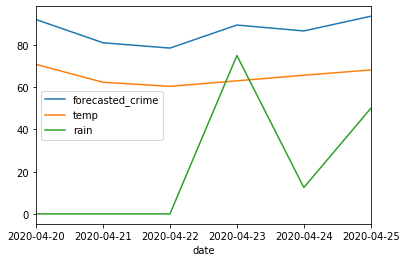

In [33]:
## default is a line graph
new_crimedf.plot()

In [34]:
prediction_df['forecasted_crime'] = prediction_df['temp']*.82 + prediction_df['rain']*5.6
prediction_df

,temp,precipitation,rain,forecasted_crime
date,,,,
2020-04-20,70.810000,0.000000,0.0,58.064200
2020-04-21,62.342500,0.000000,0.0,51.120850
2020-04-22,60.402500,0.000000,0.0,49.530050
2020-04-23,63.030000,6.173750,75.0,471.684600
2020-04-24,65.686250,0.047500,12.5,123.862725
2020-04-25,68.156667,0.246667,50.0,335.888467


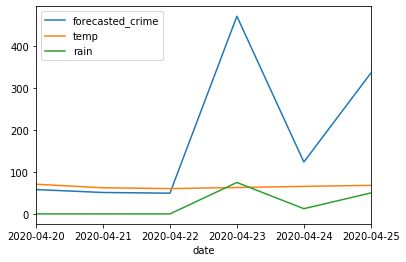

In [36]:
candice_df = pd.DataFrame(prediction_df[['forecasted_crime','temp','rain']])
candice_df.plot()